In [1]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#read the video and then convert the frames into images, these images are images showing the mask that takes of the ship
#the first method of masking is by MOG2 backward subtraction method

#backward subtraction is used to mask the....

backSub = cv.createBackgroundSubtractorMOG2()
#backSub2 = cv.createBackgroundSubtractorKNN()

vid_cap = cv.VideoCapture('Images/pancakes5.mp4')
i = 0
while(1):
    
    ret,frame = vid_cap.read()
    
    if frame is None:
        break
    else:
        foreground = backSub.apply(frame)
        cv.imwrite('ImageMOG2'+str(i)+'.bmp',foreground)
        i+=1
        cv.imshow('Foreground',foreground)
        k = cv.waitKey(1000) & 0xFF
        if k==27:
            break
vid_cap.release()
cv.destroyAllWindows()

In [2]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#the method of masking here is KNN 
backSub2 = cv.createBackgroundSubtractorKNN()
vid_cap = cv.VideoCapture('Images/pancakes5.mp4')
j = 0
while(1):
    
    ret,frame2 = vid_cap.read()
    
    if frame2 is None:
        break
    else:
        foreground2 = backSub2.apply(frame2)
        cv.imwrite('ImageKNN'+str(j)+'.bmp',foreground)
        cv.imwrite('Image'+str(j)+'.bmp',frame2)  #also right the original frame
        j+=1
        #cv.imshow('Foreground',foreground)
        cv.imshow('frame',frame2)
        k = cv.waitKey(1000) & 0xFF
        if k==27:
            break
vid_cap.release()
cv.destroyAllWindows()

(-0.5, 1919.5, 1079.5, -0.5)

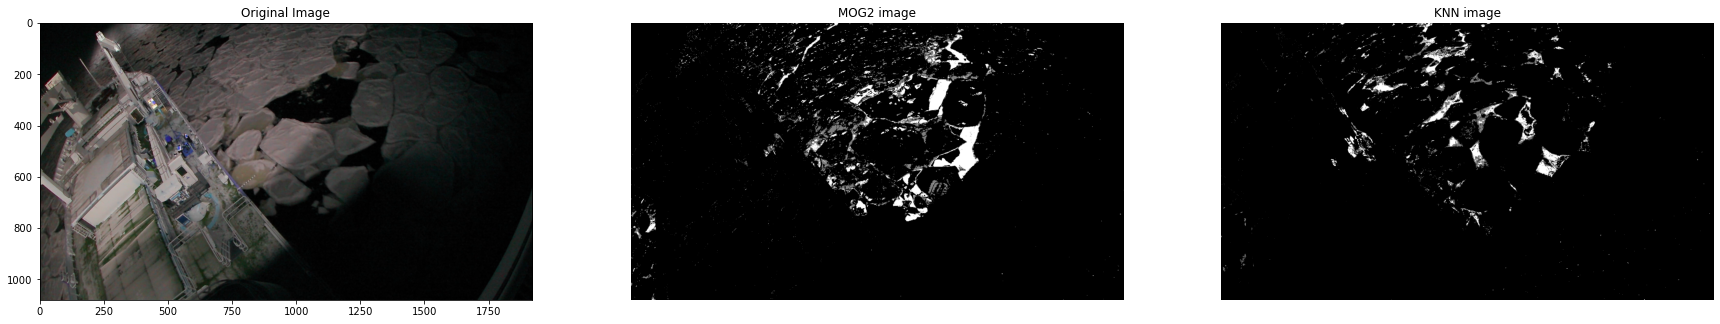

In [1]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#the tenth frame is first chosen for processing
#first three images from the videos will be posted showing 10th original frame, 10th frame from KNN and MOG2 
#these images will be put in the new folder called Image_frames
MOG2 = cv.imread('./Image_frames/ImageMOG27.bmp')
KNN  = cv.imread('./Image_frames/ImageKNN7.bmp')
Im   = cv.imread('./Image_frames/Image7.bmp')

plt.figure(figsize=(30,30))
plt.subplot(131)
plt.imshow(Im)
plt.title('Original Image')
#plt.axis('off');

plt.subplot(132)
plt.imshow(MOG2)
plt.title('MOG2 image')
plt.axis('off')

plt.subplot(133)
plt.imshow(KNN)
plt.title('KNN image')
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

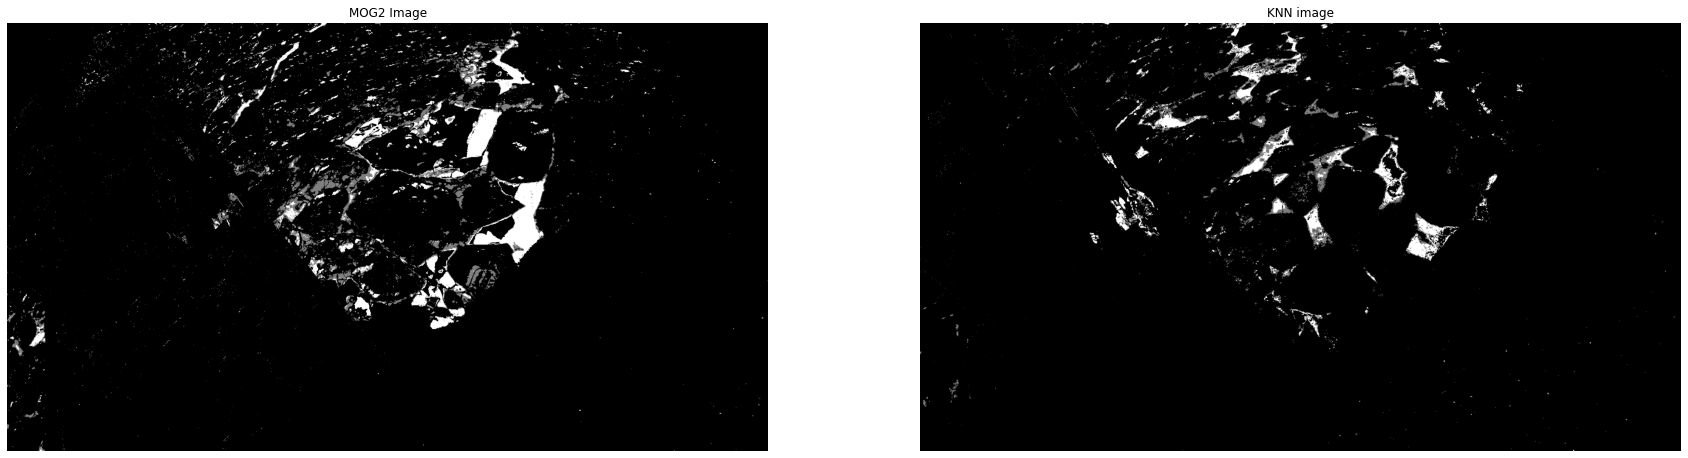

In [2]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#compare the image from KNN and MOG2 
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.imshow(MOG2)
plt.title('MOG2 Image')
plt.axis('off');

plt.subplot(122)
plt.imshow(KNN)
plt.title('KNN image')
plt.axis('off')
#KNN is faster than MOG2

(-0.5, 1919.5, 1079.5, -0.5)

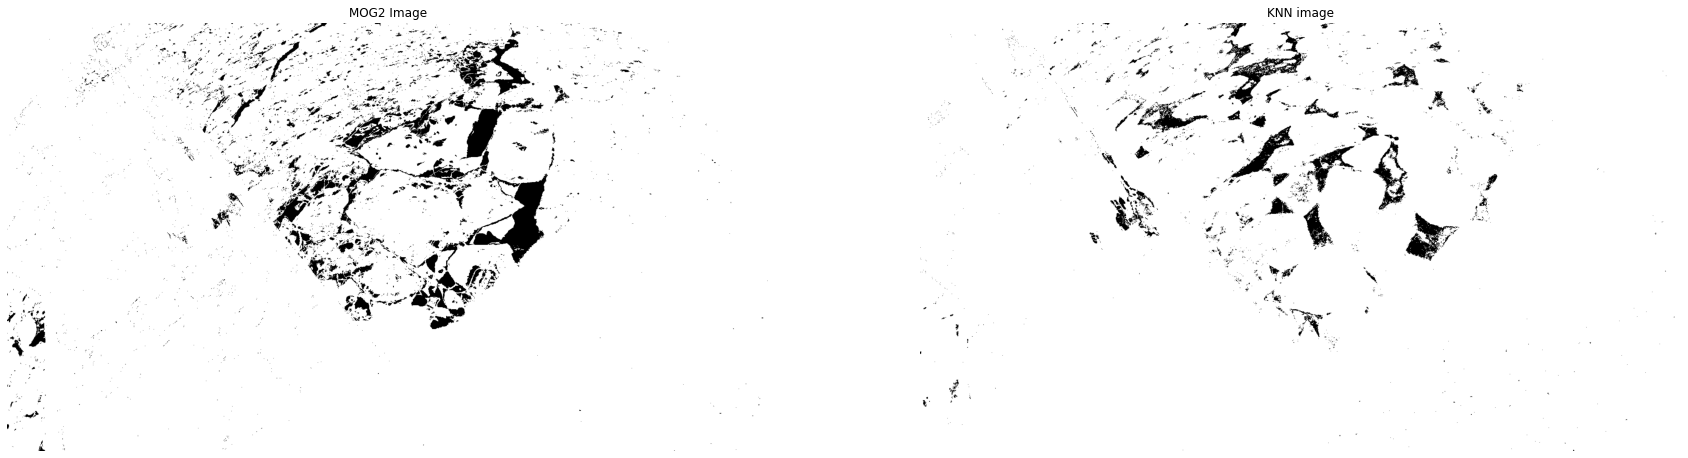

In [3]:
import cv2, numpy as np
from matplotlib import pyplot as plt

#invert the binary images to get a clear picture of ice
MOG2in = cv2.threshold(MOG2,10,255,cv2.THRESH_BINARY_INV)[1]
KNNin  = cv2.threshold(KNN,10,255,cv2.THRESH_BINARY_INV)[1]
#compare the image from KNN and MOG2 
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.imshow(MOG2in)
plt.title('MOG2 Image')
plt.axis('off');

plt.subplot(122)
plt.imshow(KNNin)
plt.title('KNN image')
plt.axis('off')
#KNN is faster than MOG2

(-0.5, 999.5, 999.5, -0.5)

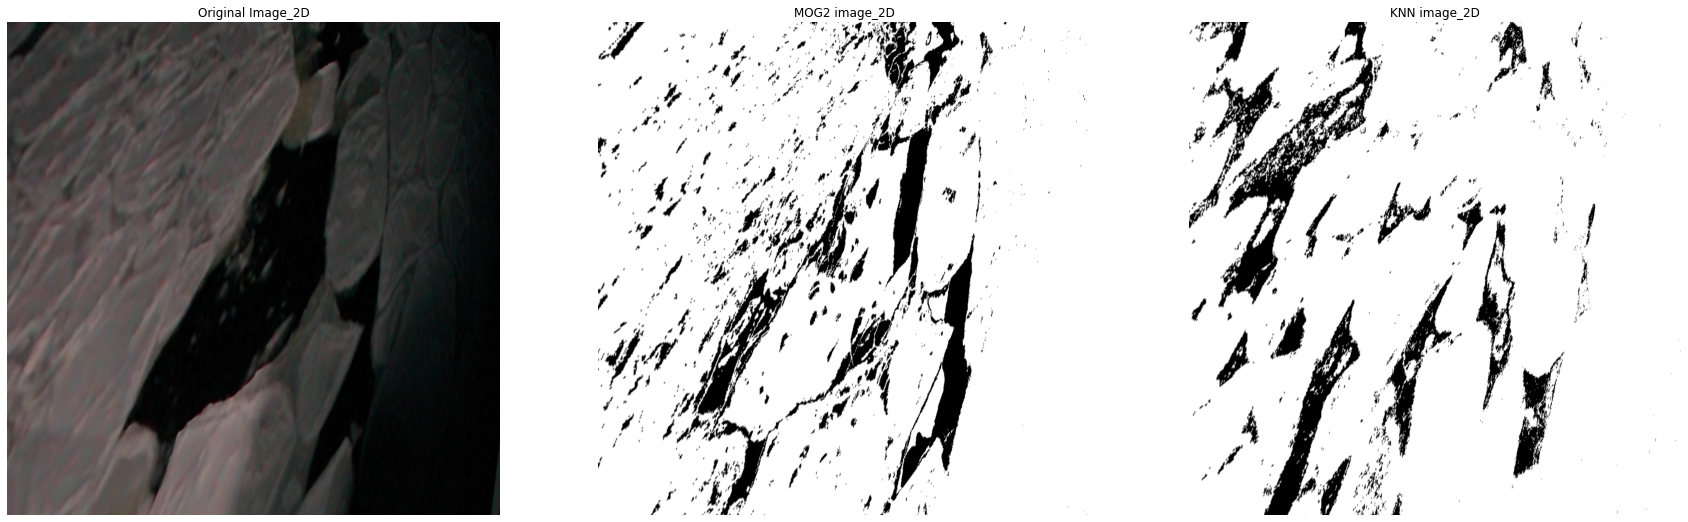

In [4]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#now perform perspective transform on every image
points_1_ = np.float32([[750,0],[2050,300],[750,600],[2050,1920]]) #done iteratively to properly project the sky away
points_2_ = np.float32([[0,0],[1080,0],[0,1920],[1080,1920]])

M_3x3_ = cv.getPerspectiveTransform(points_1_,points_2_)   #this is a 3x3 transformation matrix

Im_ = cv.warpPerspective(Im,M_3x3_,(1000,1000)) #persepective transform of Original image
MOG2_ = cv.warpPerspective(MOG2,M_3x3_,(1000,1000))
KNN_ = cv.warpPerspective(KNN,M_3x3_,(1000,1000))

#get the perspective of the inverses
MOG2in_ = cv.warpPerspective(MOG2in,M_3x3_,(1000,1000))
KNNin_  = cv.warpPerspective(KNNin,M_3x3_,(1000,1000))
#print(MOG2in_.shape)

######
plt.figure(figsize=(30,30))
plt.subplot(131)
plt.imshow(Im_)
plt.title('Original Image_2D')
plt.axis('off');

plt.subplot(132)
plt.imshow(MOG2in_)
plt.title('MOG2 image_2D')
plt.axis('off')

plt.subplot(133)
plt.imshow(KNNin_)
plt.title('KNN image_2D')
plt.axis('off')


(-0.5, 999.5, 999.5, -0.5)

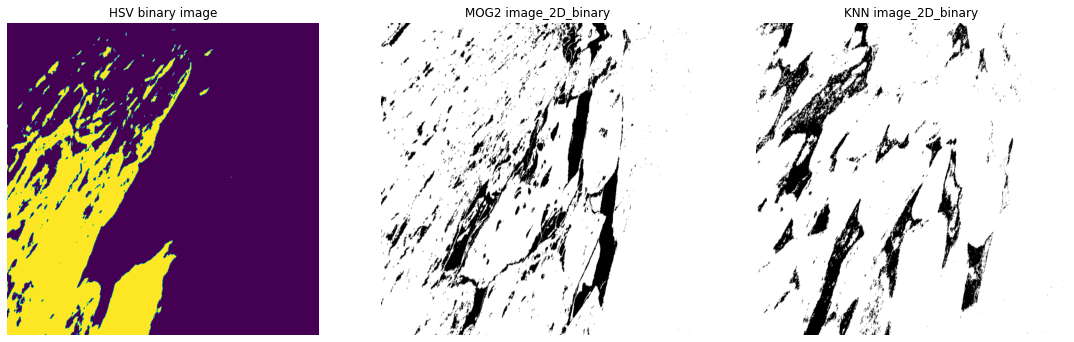

In [5]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#plot the histogram for every graph
#plt.hist(MOG2_.ravel(),256,[0,256]); plt.show()
#hist_full = cv.calcHist([MOG2in_],[2],None,[256],[0,256])
#now to hsv method
#gray_image =cv.cvtColor(Im_,cv.COLOR_BGR2GRAY)
#BGR2 = cv.cvtColor(gray_image,cv.COLOR_GRAY2BGR) 
hsv_image = cv.cvtColor(Im_,cv.COLOR_BGR2HSV)
lower_white = np.array([0,0,90])   #iteration
upper_white = np.array([200,125,255])
masking = cv.inRange(hsv_image,lower_white,upper_white)
hsv_mask = cv.bitwise_and(hsv_image,hsv_image,mask=masking)
masking_in = cv2.threshold(masking,10,255,cv2.THRESH_BINARY_INV)[1]
#print(masking.shape)
plt.figure(figsize=(19,19))
plt.subplot(131)
plt.imshow(masking)
plt.title('HSV binary image')
plt.axis('off');

plt.subplot(132)
plt.imshow(MOG2in_)
plt.title('MOG2 image_2D_binary')
plt.axis('off')

plt.subplot(133)
plt.imshow(KNNin_)
plt.title('KNN image_2D_binary')
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

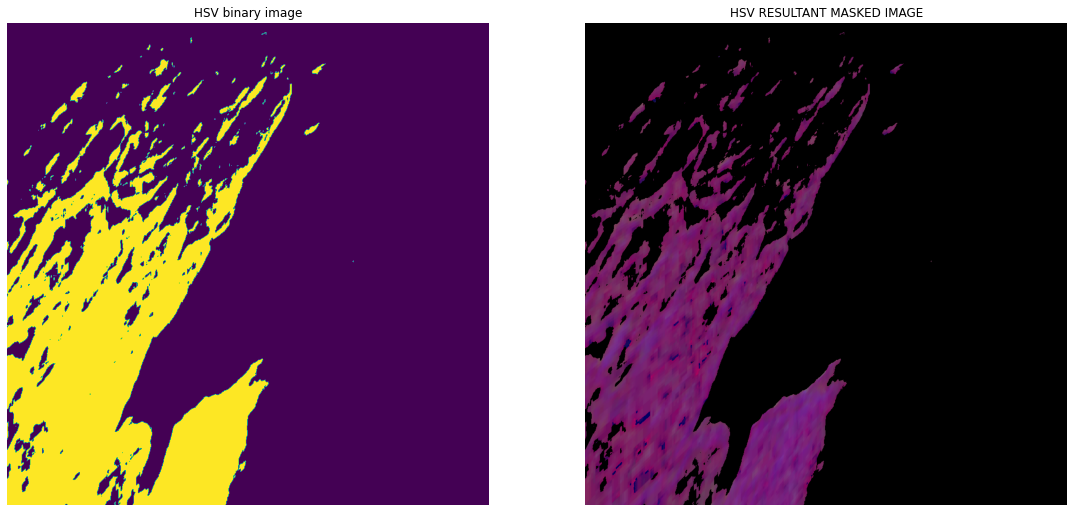

In [6]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#now plot the resultant masked image of the hsv picture
plt.figure(figsize=(19,19))
plt.subplot(121)
plt.imshow(masking)
plt.title('HSV binary image')
plt.axis('off');

plt.subplot(122)
plt.imshow(hsv_mask)
plt.title('HSV RESULTANT MASKED IMAGE')
plt.axis('off')

(1000, 1000)
The concentration of consolidated ice from HSV method is 25.241365133315778 %
The concentration of consolidated ice from MOG2 method is 86.33052567684648 %
The concentration of consolidated ice from KNN method is  85.74162799188326 %


(-0.5, 999.5, 999.5, -0.5)

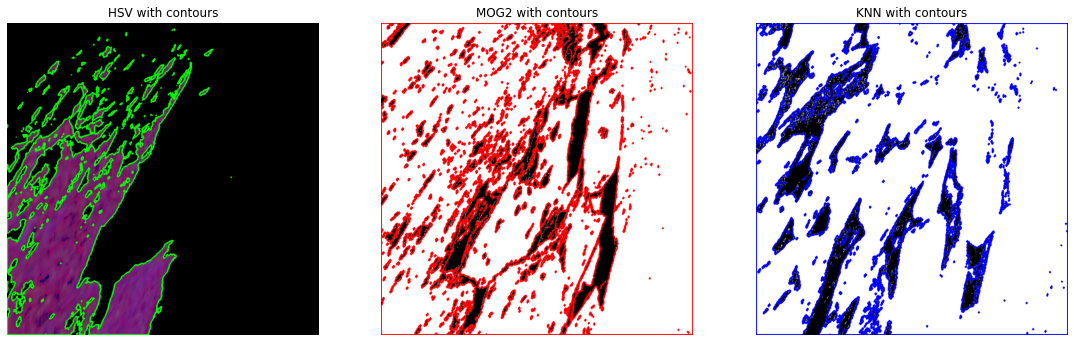

In [7]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#now detect contours on HSV,MOG2,KNN images to represent consolidated ice floes
#convect the binary from MOG2 to GRAY color space in order to reduce the number of pixels
gray = cv.cvtColor(MOG2_,cv.COLOR_BGR2GRAY)## convect MOG2 image from binary space to Gray in ordeber of channels
grayin =cv2.threshold(gray,10,255,cv2.THRESH_BINARY_INV)[1]

#convect the binary from KNN to GRAY color space
grayK = cv.cvtColor(KNN_,cv.COLOR_BGR2GRAY) #still binary but with reduced channels from 3 to 1
grayKin = cv2.threshold(grayK,10,255,cv2.THRESH_BINARY_INV)[1]
contours, hierarchy = cv.findContours(masking, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_in, hierarchy_in = cv.findContours(masking_in, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#contours for MOG2
contoursMOG2, hierarchyMOG2 = cv.findContours(grayin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) #find contours on MOG2 image
contoursMOG2in, hierarchyMOG2in = cv.findContours(gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#contours for KNN
contoursKNN, hierarchyKNN = cv.findContours(grayKin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contoursKNNin, hierarchyKNNin = cv.findContours(grayK, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#drawing the contours to images
cnt_dr=cv.drawContours(hsv_mask, contours, -1, (0,255,0), 3)
cnt_dr2=cv.drawContours(MOG2in_, contoursMOG2, -1, (255,0,0), 3)
cnt_dr3 =cv.drawContours(KNNin_, contoursKNN, -1, (0,0,255), 3)

print(gray.shape)
cm_ratio = 96/2.54
#lists
HSV_list =[]  #list to store consolidated ice floes from HSV method
not_floes=[]  #list to store everything that isn't floes
MOG2_list =[]
MOG2_not = [] #list what is not consolidated ice from MOG2
KNN   = []
KNNnot = []
DiametersHSV = []
DiametersMOG2 = []
DiametersKNN = []
#for loop to calculate floe parameters in HSV mode
for i in range(len(contours)):
    floeHSV_area = cv.contourArea(contours[i])
    HSV_list.append(floeHSV_area)
    (x1,y1),radius1 = cv.minEnclosingCircle(contours[i])
    center1 = (int(x1),int(y1))
    diameter1 = int(radius1)*2*(cm_ratio)   #convect from px to cm
    DiametersHSV.append(diameter1)

for j in range(len(contours_in)):
    floeHSV_in = cv.contourArea(contours_in[j])
    not_floes.append(floeHSV_in)
    
for m in range(len(contoursMOG2)):
    floeMOG2_area =cv.contourArea(contoursMOG2[m])
    MOG2_list.append(floeMOG2_area)
    (x2,y2),radius2 = cv.minEnclosingCircle(contoursMOG2[m])
    center2 = (int(x2),int(y2))
    diameter2 = int(radius2)*2*(cm_ratio)   #convect from px to cm
    DiametersMOG2.append(diameter2)

for n in range(len(contoursMOG2in)):
    notMOG2 = cv.contourArea(contoursMOG2in[n])
    MOG2_not.append(notMOG2)

for k in range(len(contoursKNN)):
    KNN_floe = cv.contourArea(contoursKNN[k])
    KNN.append(KNN_floe)
    (x3,y3),radius3 = cv.minEnclosingCircle(contoursKNN[k])
    center3 = (int(x3),int(y3))
    diameter3 = int(radius3)*2*(cm_ratio)   #convect from px to cm
    DiametersKNN.append(diameter3)
    
for l in range(len(contoursKNNin)):
    notKNNfloe = cv.contourArea(contoursKNNin[l])
    KNNnot.append(notKNNfloe)
    
    
Sum_HSVfloes = sum(HSV_list)
Sum_notfloes = sum(not_floes)
Sum_MOG2floes = sum(MOG2_list)
SUMnot_MOG2 = sum(MOG2_not)
SumKNN = sum(KNN)
SumnotKNN = sum(KNNnot)
FOV_KNN = SumKNN + SumnotKNN
FOV_MOG2 = Sum_MOG2floes + SUMnot_MOG2
FOV_area = Sum_HSVfloes+Sum_notfloes
conc_HSV = (Sum_HSVfloes/FOV_area)*100
conc_MOG2 = (Sum_MOG2floes/FOV_MOG2)*100
conc_KNN = (SumKNN/FOV_KNN)*100
print("The concentration of consolidated ice from HSV method is",conc_HSV,"%")
print("The concentration of consolidated ice from MOG2 method is",conc_MOG2,"%")
print("The concentration of consolidated ice from KNN method is ",conc_KNN,"%")
#print(DiametersHSV)


plt.figure(figsize=(19,19))
plt.subplot(131)
plt.imshow(hsv_mask)
plt.title('HSV with contours')
plt.axis('off');

plt.subplot(132)
plt.imshow(MOG2in_)
plt.title('MOG2 with contours')
plt.axis('off')

plt.subplot(133)
plt.imshow(KNNin_)
plt.title('KNN with contours')
plt.axis('off')


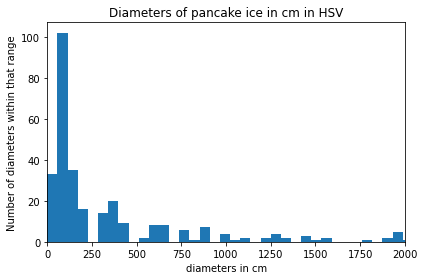

In [8]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

#analyisis of data
#print(DiametersHSV)
plt.hist(DiametersHSV,bins=700)

plt.title('Diameters of pancake ice in cm in HSV')
plt.xlabel('diameters in cm')
plt.ylabel('Number of diameters within that range')
plt.xlim([0,2000])  #standard is 20000

plt.tight_layout()
plt.show()

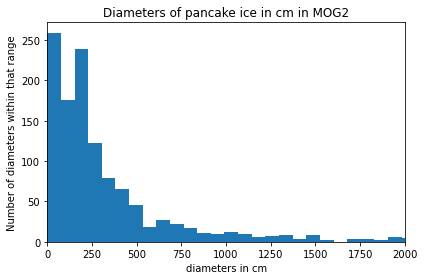

In [9]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

plt.hist(DiametersMOG2,bins=700)

plt.title('Diameters of pancake ice in cm in MOG2')
plt.xlabel('diameters in cm')
plt.ylabel('Number of diameters within that range')
plt.xlim([0,2000])

plt.tight_layout()
plt.show()


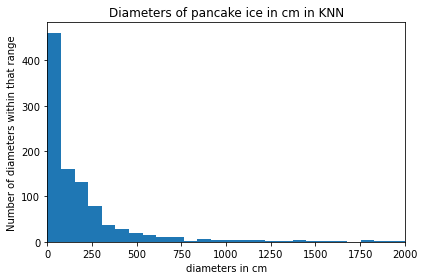

In [10]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

plt.hist(DiametersKNN,bins=700)

plt.title('Diameters of pancake ice in cm in KNN')
plt.xlabel('diameters in cm')
plt.ylabel('Number of diameters within that range')
plt.xlim([0,2000])

plt.tight_layout()
plt.show()


In [ ]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

mu = len(DiametersHSV)
sigma = 10
n_bins = 700

fig, ax = plt.subplots(figsize=(10, 6))
# plot the cumulative histogram
n, bins, patches = ax.hist(DiametersHSV, n_bins, density=True, histtype='step',cumulative=True)#label='Empirical')


#ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Diameters  (cm)')
ax.set_ylabel('Likelihood of occurrence')
ax.set_xlim([0,2000])

plt.show()

In [ ]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(DiametersMOG2, n_bins, density=True, histtype='step',cumulative=True)#label='Empirical')

#ax.legend(loc='right')
ax.set_title('Cumulative step histograms in MOG2')
ax.set_xlabel('Diameters  (cm)')
ax.set_ylabel('Likelihood of occurrence')
ax.set_xlim([0,2000])

plt.show()


In [ ]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(DiametersKNN, n_bins, density=True, histtype='step',cumulative=True) #label='Empirical')

#ax.legend(loc='right')
ax.set_title('Cumulative step histograms in KNN')
ax.set_xlabel('Diameters  (cm)')
ax.set_ylabel('Likelihood of occurrence')
ax.set_xlim([0,2000])

plt.show()
